In [1]:
# sys.path.append('naturecomm_cscg')

# !pip install cairocffi
# !pip install python-igraph==0.9.8
# !pip install cairocffi
# !pip install igraph==0.9.8

from cscg_actions import *
from ged import *
from util import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random


# import numpy as np


In [2]:
# import numpy as np

def generate_custom_colors(num_unique_observations):
    # Define a fixed set of custom colors as RGB values
    predefined_colors = np.array([
        [214, 214, 214],
        [85, 35, 157],
        [253, 252, 144],
        [114, 245, 144],
        [151, 38, 20],
        [239, 142, 192],
        [214, 134, 48],
        [140, 194, 250],
        [72, 160, 162],
    ])

    # If the number of unique observations is greater than the number of predefined colors,
    # cycle through the predefined colors to ensure enough colors are available
    if num_unique_observations > len(predefined_colors):
        extra_colors_needed = num_unique_observations - len(predefined_colors)
        additional_colors = np.tile(predefined_colors, (extra_colors_needed // len(predefined_colors) + 1, 1))
        custom_colors = np.vstack((predefined_colors, additional_colors))[:num_unique_observations]
    else:
        custom_colors = predefined_colors[:num_unique_observations]

    return custom_colors


In [3]:

# Function to create a lattice graph with variable nodes, observations, and aliased states
def create_modular_graph_varied(num_nodes=15, num_observations=10000, num_aliased_states=10, num_modules=3):
    if num_nodes < 4:
        raise ValueError("num_nodes must be at least 4 to allow for meaningful connectivity.")

    if num_nodes < num_modules:
        raise ValueError("Number of nodes must be at least equal to the number of modules to form a meaningful structure.")

    # Initialize the adjacency matrix
    T = np.zeros((num_nodes, num_nodes))

    # Calculate the size of each module
    module_size = num_nodes // num_modules

    for module_index in range(num_modules):
        module_start = module_index * module_size
        # For the last module, extend to the end of the node list
        module_end = module_start + module_size if module_index < num_modules - 1 else num_nodes

        # Fully connect nodes within the module
        for i in range(module_start, module_end):
            for j in range(module_start, module_end):
                if i != j:
                    T[i, j] = 1.0
    # Optionally, add sparse inter-module connections
    # Example: Connecting last node of one module to first node of the next module
    for module_index in range(num_modules - 1):
        module_end = (module_index + 1) * module_size - 1
        next_module_start = (module_end + 1) % num_nodes
        T[module_end, next_module_start] = 1.0
        T[next_module_start, module_end] = 1.0
    # connect first and last module
    T[0, num_nodes-1] = 1.0
    T[num_nodes-1,0] = 1.0



    # Generate observations based on random walks on the lattice graph
    states = [np.random.choice(range(num_nodes))]  # Start from a random state
    for _ in range(1, num_observations):
        current_state = states[-1]
        possible_next_states = np.where(T[current_state, :] > 0)[0]
        next_state = np.random.choice(possible_next_states)
        states.append(next_state)


    # Map states to observations with aliasing
    if num_aliased_states > num_nodes or num_aliased_states < 1:
        raise ValueError("num_aliased_states must be between 1 and the number of nodes.")


    unique_obs = np.arange(num_nodes - num_aliased_states)
    for n in range(num_aliased_states):
      unique_obs = np.append(unique_obs,random.choice(unique_obs))
    state_to_obs = unique_obs # Aliasing version

    # Create observation data
    x = state_to_obs[states]

    plt.matshow(T)
    plt.show()

    return x

# Function to create a lattice graph with variable nodes, observations, and aliased states
def create_lattice_graph_varied(num_nodes=15, num_observations=10000, num_aliased_states=10):
    if num_nodes < 4:
        raise ValueError("num_nodes must be at least 4 to allow for meaningful connectivity.")

    # Initialize the adjacency matrix
    T = np.zeros((num_nodes, num_nodes))

    # Connect each node to its immediate and second-order neighbors with wrapping
    for i in range(num_nodes):
        for offset in [-2, -1, 1, 2]:  # Immediate and second-order neighbors
            j = (i + offset) % num_nodes
            T[i, j] = 1.0

    # Generate observations based on random walks on the lattice graph
    states = [np.random.choice(range(num_nodes))]  # Start from a random state
    for _ in range(1, num_observations):
        current_state = states[-1]
        possible_next_states = np.where(T[current_state, :] > 0)[0]
        next_state = np.random.choice(possible_next_states)
        states.append(next_state)


    # Map states to observations with aliasing
    if num_aliased_states > num_nodes or num_aliased_states < 1:
        raise ValueError("num_aliased_states must be between 1 and the number of nodes.")


    unique_obs = np.arange(num_nodes - num_aliased_states)
    for n in range(num_aliased_states):
      unique_obs = np.append(unique_obs,random.choice(unique_obs))
    state_to_obs = unique_obs # Aliasing version

    # Create observation data
    x = state_to_obs[states]

    plt.matshow(T)

    return x

30 nodes, 10 aliased states, 3 modules, 0.0 alpha


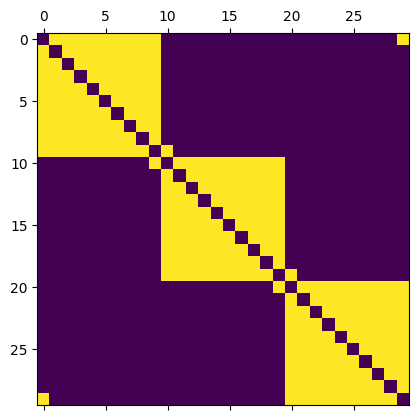

  0%|          | 0/20 [00:00<?, ?it/s]

viterbi C: (1, 20, 20)
viterbi T: (1, 20, 20)


 10%|█         | 2/20 [00:03<00:35,  1.97s/it, train_bps=3.45]


decode C: (1, 20, 20)
decode T: (1, 20, 20)
decode Pi: (20,)
decode n_clones: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
decode C: (1, 20, 20)
decode T: (1, 20, 20)
decode Pi: (20,)
decode n_clones: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Clustering with 20 elements and 2 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
[1] 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
Modularity Score: 0.34


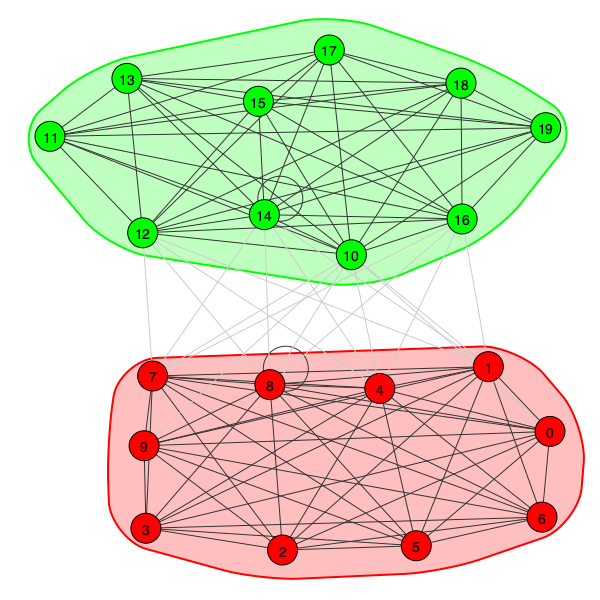

Room 0 has 1 tables (clones)
Room 1 has 1 tables (clones)
Room 2 has 1 tables (clones)
Room 3 has 1 tables (clones)
Room 4 has 1 tables (clones)
Room 5 has 1 tables (clones)
Room 6 has 1 tables (clones)
Room 7 has 1 tables (clones)
Room 8 has 1 tables (clones)
Room 9 has 1 tables (clones)
Room 10 has 1 tables (clones)
Room 11 has 1 tables (clones)
Room 12 has 1 tables (clones)
Room 13 has 1 tables (clones)
Room 14 has 1 tables (clones)
Room 15 has 1 tables (clones)
Room 16 has 1 tables (clones)
Room 17 has 1 tables (clones)
Room 18 has 1 tables (clones)
Room 19 has 1 tables (clones)
Total clones used: 20
Clones that would have been used by the original code: 100
30 nodes, 10 aliased states, 3 modules, 0.3 alpha


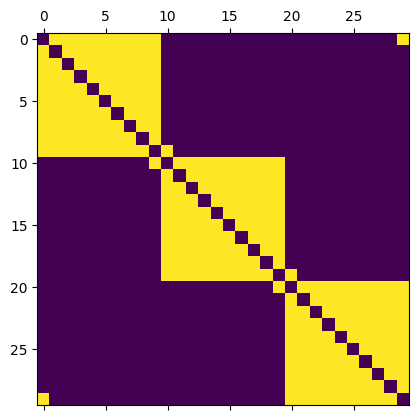

  0%|          | 0/20 [00:00<?, ?it/s]

viterbi C: (1, 82, 82)
viterbi T: (1, 82, 82)


100%|██████████| 20/20 [00:31<00:00,  1.60s/it, train_bps=3.27]


decode C: (1, 82, 82)
decode T: (1, 82, 82)
decode Pi: (20,)
decode n_clones: [5 4 4 3 4 5 2 4 4 4 3 8 1 5 5 6 3 4 2 6]
decode C: (1, 82, 82)
decode T: (1, 82, 82)
decode Pi: (20,)
decode n_clones: [5 4 4 3 4 5 2 4 4 4 3 8 1 5 5 6 3 4 2 6]
Clustering with 78 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
    25, 26, 27, 29, 30, 31, 32, 33, 34, 35
[1] 4, 5, 6, 12, 13, 28, 36, 40, 43, 45, 48, 50, 51, 71, 72, 76, 77
[2] 37, 38, 39, 41, 42, 44, 46, 47, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60,
    61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 74, 75
Modularity Score: 0.46


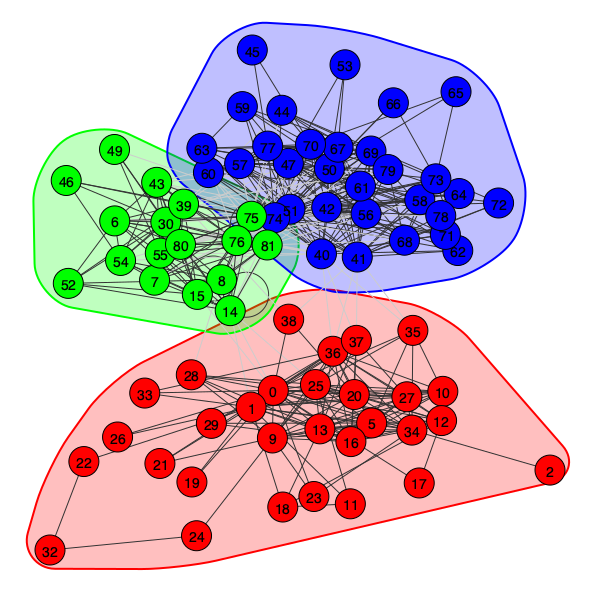

Room 0 has 5 tables (clones)
Room 1 has 4 tables (clones)
Room 2 has 4 tables (clones)
Room 3 has 3 tables (clones)
Room 4 has 4 tables (clones)
Room 5 has 5 tables (clones)
Room 6 has 2 tables (clones)
Room 7 has 4 tables (clones)
Room 8 has 4 tables (clones)
Room 9 has 4 tables (clones)
Room 10 has 3 tables (clones)
Room 11 has 8 tables (clones)
Room 12 has 1 tables (clones)
Room 13 has 5 tables (clones)
Room 14 has 5 tables (clones)
Room 15 has 6 tables (clones)
Room 16 has 3 tables (clones)
Room 17 has 4 tables (clones)
Room 18 has 2 tables (clones)
Room 19 has 6 tables (clones)
Total clones used: 82
Clones that would have been used by the original code: 100
30 nodes, 10 aliased states, 3 modules, 0.6 alpha


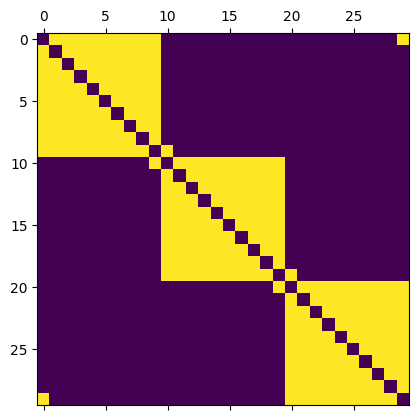

  0%|          | 0/20 [00:00<?, ?it/s]

viterbi C: (1, 135, 135)
viterbi T: (1, 135, 135)


100%|██████████| 20/20 [00:36<00:00,  1.84s/it, train_bps=3.26]


decode C: (1, 135, 135)
decode T: (1, 135, 135)
decode Pi: (20,)
decode n_clones: [9 6 7 7 7 5 9 6 6 7 6 8 6 3 6 8 7 8 9 5]
decode C: (1, 135, 135)
decode T: (1, 135, 135)
decode Pi: (20,)
decode n_clones: [9 6 7 7 7 5 9 6 6 7 6 8 6 3 6 8 7 8 9 5]
Clustering with 120 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 17, 19, 20, 21, 22, 23, 25, 28, 29, 30, 31,
    32, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52,
    53, 55, 58, 59, 60, 61
[1] 8, 10, 11, 13, 14, 15, 16, 18, 24, 26, 27, 39, 41, 51, 54, 56, 57, 62, 63,
    105, 106, 110, 112
[2] 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
    100, 101, 102, 103, 104, 107, 108, 109, 111, 113, 114, 115, 116, 117, 118,
    119
Modularity Score: 0.43


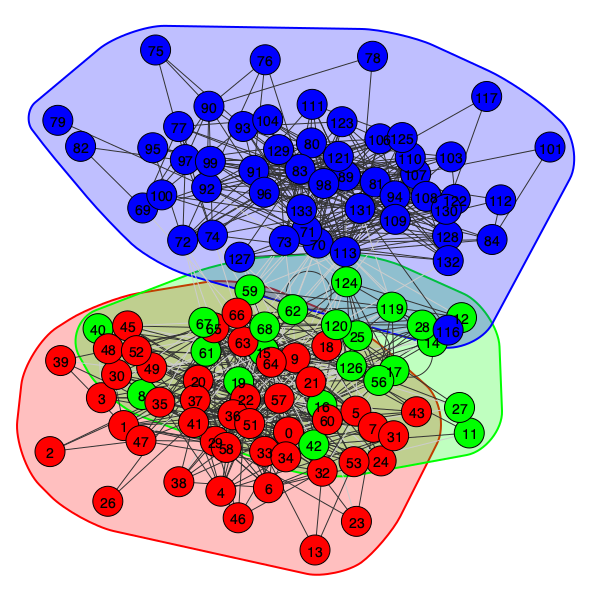

Room 0 has 9 tables (clones)
Room 1 has 6 tables (clones)
Room 2 has 7 tables (clones)
Room 3 has 7 tables (clones)
Room 4 has 7 tables (clones)
Room 5 has 5 tables (clones)
Room 6 has 9 tables (clones)
Room 7 has 6 tables (clones)
Room 8 has 6 tables (clones)
Room 9 has 7 tables (clones)
Room 10 has 6 tables (clones)
Room 11 has 8 tables (clones)
Room 12 has 6 tables (clones)
Room 13 has 3 tables (clones)
Room 14 has 6 tables (clones)
Room 15 has 8 tables (clones)
Room 16 has 7 tables (clones)
Room 17 has 8 tables (clones)
Room 18 has 9 tables (clones)
Room 19 has 5 tables (clones)
Total clones used: 135
Clones that would have been used by the original code: 100
30 nodes, 10 aliased states, 3 modules, 0.8999999999999999 alpha


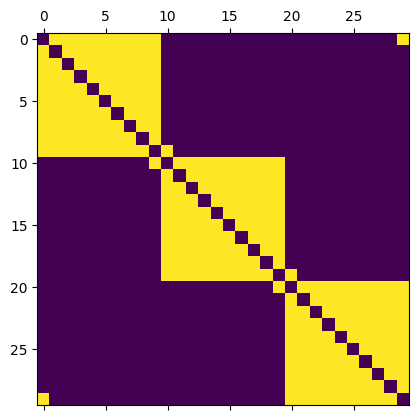

  0%|          | 0/20 [00:00<?, ?it/s]

viterbi C: (1, 204, 204)
viterbi T: (1, 204, 204)


100%|██████████| 20/20 [00:43<00:00,  2.15s/it, train_bps=3.34]


decode C: (1, 204, 204)
decode T: (1, 204, 204)
decode Pi: (20,)
decode n_clones: [10 11 14 15 12 12 10 10 11 11  8  6 10  9  6  6 12 11  8 12]
decode C: (1, 204, 204)
decode T: (1, 204, 204)
decode Pi: (20,)
decode n_clones: [10 11 14 15 12 12 10 10 11 11  8  6 10  9  6  6 12 11  8 12]
Clustering with 184 elements and 3 clusters
[0] 0, 1, 2, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
    25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 44, 45,
    47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
    65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83,
    84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99
[1] 3, 4, 6, 7, 9, 38, 40, 43, 46, 76, 102, 110, 111, 119, 138, 139, 140, 142,
    155, 160, 161, 162
[2] 100, 101, 103, 104, 105, 106, 107, 108, 109, 112, 113, 114, 115, 116, 117,
    118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
    134, 135, 136, 137, 141, 143, 

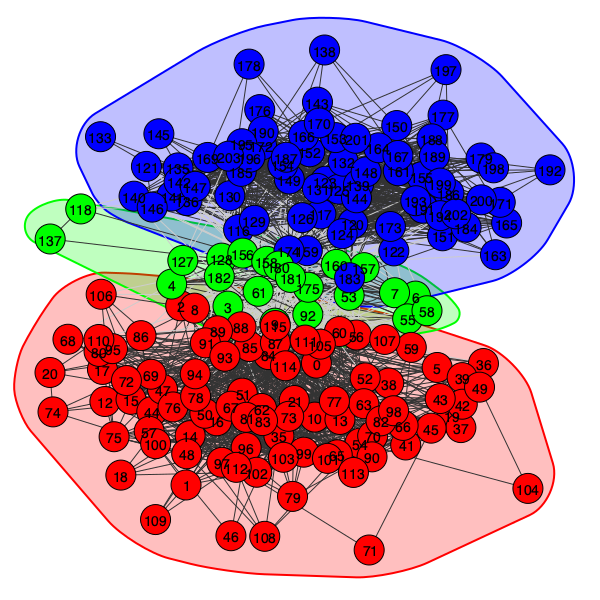

Room 0 has 10 tables (clones)
Room 1 has 11 tables (clones)
Room 2 has 14 tables (clones)
Room 3 has 15 tables (clones)
Room 4 has 12 tables (clones)
Room 5 has 12 tables (clones)
Room 6 has 10 tables (clones)
Room 7 has 10 tables (clones)
Room 8 has 11 tables (clones)
Room 9 has 11 tables (clones)
Room 10 has 8 tables (clones)
Room 11 has 6 tables (clones)
Room 12 has 10 tables (clones)
Room 13 has 9 tables (clones)
Room 14 has 6 tables (clones)
Room 15 has 6 tables (clones)
Room 16 has 12 tables (clones)
Room 17 has 11 tables (clones)
Room 18 has 8 tables (clones)
Room 19 has 12 tables (clones)
Total clones used: 204
Clones that would have been used by the original code: 100


In [4]:
# var_nodes = np.arange(5,50,5)
num_nodes = 30
num_observations = 50000
num_aliased_states = 2  # Adjust this to change the number of aliased states
num_clones = 10
num_modules=3
var_clones = np.arange(1,15,1)
total_modularity_scores = []
var_aliasing = np.arange(2,4,1)
# for num_clones in var_clones:
modularity_scores = []
# for aliasing in var_aliasing:
for alpha in np.arange(0,1,0.3):
  aliasing = 3

  num_aliased_states = num_nodes//aliasing  # Adjust this to change the number of aliased states

  #1. MODULAR GRAPH
  # print("modular graph".format(num_clones))
  print("{} nodes, {} aliased states, {} modules, {} alpha".format(num_nodes, num_aliased_states,num_modules, alpha))

  # Create observation data
  x = create_modular_graph_varied(num_nodes, num_observations, num_aliased_states, num_modules)
  a = np.zeros(len(x), dtype=int)

  n_clones = np.ones(max(x)+1, dtype=np.int64) * num_clones
  container = TableContainer()
  # n_clones = np.ones(n_emissions, dtype=np.int64) * nclone
  # container = TableContainer()
  chmm = CHMM_LCM(n_clones=n_clones, pseudocount=2e-3, x=x, a=a, container=container,alpha=alpha,seed=42)  # Initialize the model
  progression = chmm.learn_em_T(x, a, n_iter=20,
                                # term_early=False,
                                )  # Training   use n_iter=1000 for better training
  # progression = chmm.learn_em_E(x, a, n_iter=1000)  # Training   use n_iter=1000 for better training

  # Consolidate learning. Takes a few seconds
  chmm.pseudocount = 0.0
  chmm.learn_viterbi_T(x, a, n_iter=20)
  states = chmm.decode(x, a)[1]
  n_states = len(np.unique(states))

  custom_colors = generate_custom_colors(max(x)+1)/256
  arr = np.arange(max(x)+1)
  np.random.shuffle(arr)
  cmap = colors.ListedColormap(custom_colors[arr])

  temp_output_file = f"modular_graph_num_nodes_{num_nodes}.png"  # Temporary file for each clone
  graph, modularity_score, v, g = plot_graph_modularity(chmm, x, a, output_file=temp_output_file, cmap=cmap)
  # print('Ground truth number of nodes: {}, number of nodes recovered {}'.format(num_nodes, len(v)))
  # Display the image inline
  display(Image(filename=temp_output_file))

  modularity_scores.append(modularity_score)

  n_clones = 0
  for roomid in range(len(container.groups_of_tables)):
    print("Room {} has {} tables (clones)".format(roomid, len(container.groups_of_tables[roomid])))
    n_clones+=len(container.groups_of_tables[roomid])
  print("Total clones used: {}".format(n_clones))
  print("Clones that would have been used by the original code: {}".format(len(container.groups_of_tables) * 5))

# total_modularity_scores.append(modularity_scores)


  # #2. LATTICE GRAPH
  # print('\n')
  # print("{} clones: lattice graph".format(num_clones))
  # print("{} nodes, {} aliased states".format(num_nodes, num_aliased_states))

  # # Create observation data
  # x = create_lattice_graph_varied(num_nodes, num_observations, num_aliased_states)
  # a = np.zeros(len(x), dtype=int)

  # n_clones = np.ones(max(x)+1, dtype=np.int64) * num_clones
  # # n_clones = np.ones(max(x)+1, dtype=np.int64) * num_clones
  # container = TableContainer()
  # chmm = CHMM_LCM(n_clones=n_clones, pseudocount=2e-3, x=x, a=a, container=container,alpha=alpha,seed=42)  # Initialize the model
  # progression = chmm.learn_em_T(x, a, n_iter=20,
  #                               # term_early=False,
  #                               )  # Training   use n_iter=1000 for better training
  # # refine learning
  # chmm.pseudocount = 0.0
  # chmm.learn_viterbi_T(x, a, n_iter=20)
  # states = chmm.decode(x, a)[1]
  # n_states = len(np.unique(states))
  # n_states

  # custom_colors = generate_custom_colors(max(x)+1)/256
  # arr = np.arange(max(x)+1)
  # np.random.shuffle(arr)

  # cmap = colors.ListedColormap(custom_colors[arr])

  # temp_output_file = f"lattice_graph_num_clones_{num_clones}.png"  # Temporary file for each clone
  # graph, modularity_score = plot_graph_modularity(chmm, x, a, output_file=temp_output_file, cmap=cmap)
  # # print('Ground truth number of nodes: {}, number of nodes recovered {}'.format(num_nodes, len(v)))
  # # Display the image inline
  # display(Image(filename=temp_output_file))

